In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('D:\GKD\ML\BUOI3\Weather.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_21240\2411322795.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:\GKD\ML\BUOI3\Weather.csv')


In [4]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
final_data = data.fillna(0) #để thay thế tất cả các giá trị NaN (không phải số) trong DataFrame 'data' bằng 0 và lưu kết quả vào 'final_data' 
final_data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,0.0,25.555556,22.222222,23.888889,0.0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,10001,1942-7-2,0,0.0,28.888889,21.666667,25.555556,0.0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,10001,1942-7-3,2.54,0.0,26.111111,22.222222,24.444444,0.0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,10001,1942-7-4,2.54,0.0,26.666667,22.222222,24.444444,0.0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,10001,1942-7-5,0,0.0,26.666667,21.666667,24.444444,0.0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Giả sử chúng ta xây dựng mô hình cho cột MinTemp và cột MaxTemp
# Bài toán predicting maximum temperature
y = final_data['MaxTemp'].values.reshape (-1,1)
X = final_data['MinTemp'].values.reshape (-1,1)

In [11]:
# Chia tập train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Gọi mô hình linear regression, học tập tập train
# thư viện của regression nè
from sklearn.linear_model import LinearRegression

linReg = LinearRegression ()
linReg.fit (X_train, y_train)

LinearRegression()

In [14]:
y_pred = linReg.predict (X_test)
"""được sử dụng để dự đoán giá trị đầu ra cho các mẫu trong tập dữ liệu kiểm tra (X_test) 
bằng cách sử dụng mô hình hồi quy tuyến tính đã được huấn luyện (linReg)."""

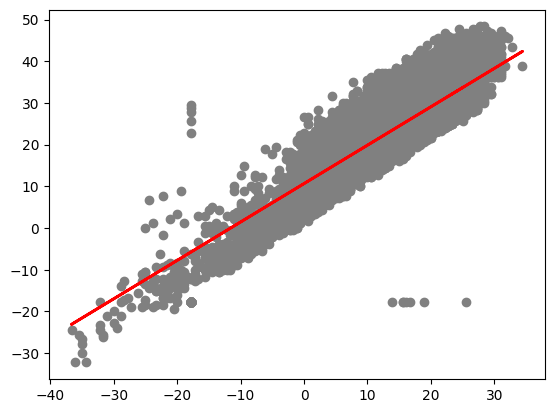

In [15]:
# mô hình hóa với matplotlib
plt.scatter ([X_test], [y_test], color='gray')
plt.plot (X_test, y_pred, color='red', linewidth=2)
plt. show ()

# evaluate model performance

ba phương pháp thống kê được sử dụng để đo lường độ chính xác của các dự đoán của mô hình hồi quy tuyến tính: Mean Absolute Error (MAE), Mean Square Error (MSE), và Root Mean Square Error (RMSE). Slide cũng bao gồm công thức toán học cho mỗi phương pháp

- Mean Absolute Error (MAE): Đo lường trung bình của giá trị tuyệt đối của sự chênh lệch giữa dự đoán và giá trị thực tế. MAE càng thấp thì mô hình càng chính xác.

- Mean Squared Error (MSE): Đo lường trung bình của bình phương của sự chênh lệch giữa dự đoán và giá trị thực tế. MSE càng thấp thì mô hình càng chính xác, nhưng nó cần phải được hiểu cẩn thận vì nó được ảnh hưởng nhiều bởi các giá trị ngoại lai.

- Root Mean Squared Error (RMSE): Là căn bậc hai của MSE. RMSE cũng được sử dụng để đo lường sự chênh lệch trung bình giữa dự đoán và giá trị thực tế, nhưng nó có thể dễ dàng so sánh với tổng trung bình của biến mục tiêu. RMSE càng thấp, mô hình càng chính xác.

In [17]:
# calculate MAE, MSE, RMSE
from sklearn import metrics
import numpy as np

print ("MAE:", metrics.mean_absolute_error(y_test, y_pred) )
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred) ))

MAE: 3.1993291783785835
MSE: 17.631568097568532
RMSE: 4.198996082109215


# Logistic Regression

In [21]:
data = pd.read_csv('D:\GKD\ML\BUOI2\WA_Fn-UseC_-Sales-Win-Loss.csv')
data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [22]:
# Assume that we predict "Opportunity Result"
"""Đoạn mã trên sử dụng LabelBinarizer từ thư viện preprocessing của sklearn để chuyển đổi các nhãn trong cột "Opportunity Result" thành các giá trị nhị phân (0 và 1). Cụ thể, nếu nhãn là "Won", thì nó được chuyển thành 1, và nếu nhãn là "Loss", thì nó được chuyển thành 0."""
lb = preprocessing.LabelBinarizer ()
data['result'] = lb.fit_transform(data['Opportunity Result'])


In [23]:
# Convert categorical features into numerical format
le = preprocessing. LabelEncoder ()

In [24]:
data ['Supplies_Subgroup_Encoded'] = le.fit_transform(data['Supplies Subgroup'])
data['Supplies_Group_Encoded'] = le.fit_transform(data['Supplies Group'])
data ['Region_Encoded'] = le.fit_transform(data['Region'])
data['Route_To_Market_Encoded'] = le.fit_transform(data['Route To Market'])
data ['Competitor_Type_Encoded'] = le.fit_transform(data['Competitor Type'])

In [25]:
final_data = data.drop(['Supplies Subgroup', 'Supplies Group', 'Region', 'Route To Market', \
'Competitor Type', 'Opportunity Result'], axis=1)

In [26]:
final_data.head()

,Opportunity Number,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category,result,Supplies_Subgroup_Encoded,Supplies_Group_Encoded,Region_Encoded,Route_To_Market_Encoded,Competitor_Type_Encoded
0,1641984,76,13,104,101,0,5,5,0,0.69636,0.113985,0.154215,1,1,2,0,3,0,2
1,1658010,63,2,163,163,0,3,5,0,0.00000,1.000000,0.000000,1,0,2,0,4,2,2
2,1674737,24,7,82,82,7750,1,1,0,1.00000,0.000000,0.000000,1,1,5,2,4,2,2
3,1675224,16,5,124,124,0,1,1,0,1.00000,0.000000,0.000000,1,0,8,2,1,2,0
4,1689785,69,11,91,13,69756,1,1,0,0.00000,0.141125,0.000000,4,0,2,0,4,2,2


In [28]:
# Apply scaling feature values
from sklearn.preprocessing import MinMaxScaler

continuous_features = ['Opportunity Number', 'Elapsed Days In Sales Stage', 'Sales Stage Change Count',
'Total Days Identified Through Closing', 'Total Days Identified Through Qualified',
'Opportunity Amount USD', 'Revenue From Client Past Two Years', 'Ratio Days Identified To Total Days',
'Ratio Days Validated To Total Days', 'Ratio Days Qualified To Total Days' ]
final_data[continuous_features] = MinMaxScaler().fit_transform(final_data[continuous_features])

In [29]:
final_data.head()

,Opportunity Number,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category,result,Supplies_Subgroup_Encoded,Supplies_Group_Encoded,Region_Encoded,Route_To_Market_Encoded,Competitor_Type_Encoded
0,0.000000,0.361905,0.545455,0.500000,0.485577,0.000000,5,5,0.0,0.69636,0.113985,0.154215,1,1,2,0,3,0,2
1,0.001896,0.300000,0.045455,0.783654,0.783654,0.000000,3,5,0.0,0.00000,1.000000,0.000000,1,0,2,0,4,2,2
2,0.003875,0.114286,0.272727,0.394231,0.394231,0.007750,1,1,0.0,1.00000,0.000000,0.000000,1,1,5,2,4,2,2
3,0.003933,0.076190,0.181818,0.596154,0.596154,0.000000,1,1,0.0,1.00000,0.000000,0.000000,1,0,8,2,1,2,0
4,0.005655,0.328571,0.454545,0.437500,0.062500,0.069756,1,1,0.0,0.00000,0.141125,0.000000,4,0,2,0,4,2,2


In [31]:
# prepare data
y = final_data["result"]
X = final_data.loc[:, final_data.columns != "result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# build the model without removing any outliers
logreg = LogisticRegression ()
logreg.fit(X_train, y_train)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.8297


In [40]:
pd.crosstab (y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,11308,725
1,1932,1640


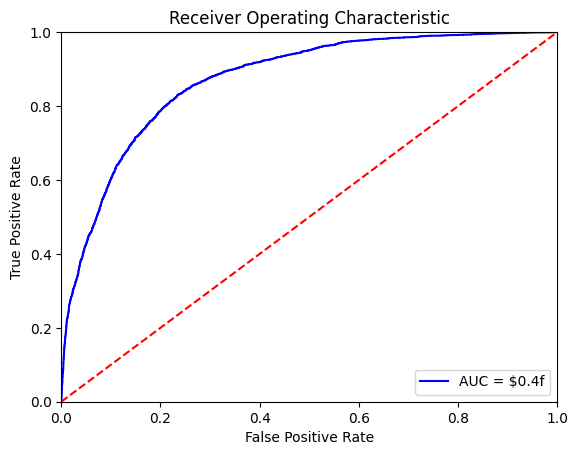

In [42]:
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = metrics.roc_curve (y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title ('Receiver Operating Characteristic')
plt.plot (fpr, tpr, 'b', label = 'AUC = $0.4f' % roc_auc)
plt. legend (loc = 'lower right')
plt.plot ([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt. ylabel ('True Positive Rate')
plt.xlabel ('False Positive Rate')
plt.show ()

# Confusion matrix, F1 score
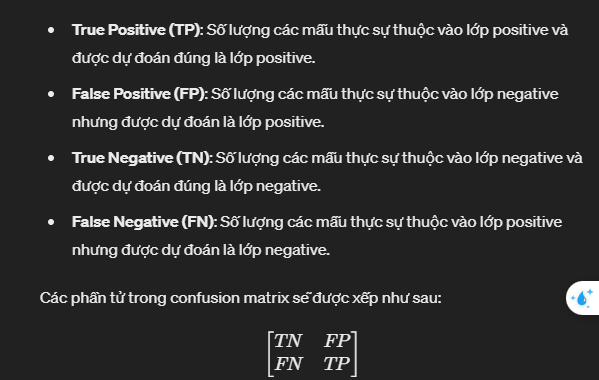

- True Positive (TP): Số lượng các mẫu thực sự thuộc về lớp dương và được dự đoán đúng là lớp dương.
- Dương tính giả (FP): Số lượng các mẫu thực tế thuộc về lớp âm nhưng được mong đợi là lớp dương.
- True Negative (TN): Số lượng thực tế của các mẫu thuộc lớp âm và được dự đoán sai là lớp âm.
- Sai âm (FN): Số lượng các mẫu thực tế thuộc về lớp dương nhưng được dự đoán là lớp âm.

In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred) )

[[11308   725]
 [ 1932  1640]]


In [45]:
from sklearn.metrics import f1_score
print (f1_score(y_test, y_pred, average='binary'))


0.5524675762169446


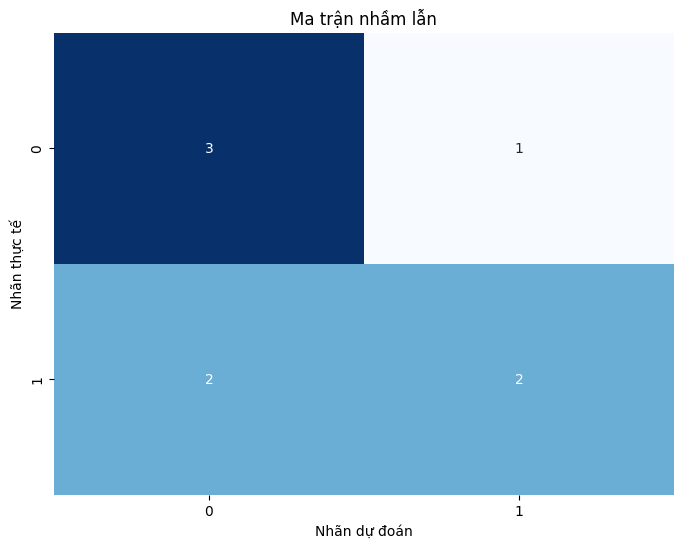

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Tạo dữ liệu minh họa (thay thế bằng dữ liệu thực tế của bạn)
y_true = np.array([0, 1, 0, 1, 0, 0, 1, 1])
y_pred = np.array([0, 1, 0, 0, 0, 1, 1, 0])

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')
plt.title('Ma trận nhầm lẫn')
plt.show()


Confusion matrix, without normalization
[[11308   725]
 [ 1932  1640]]


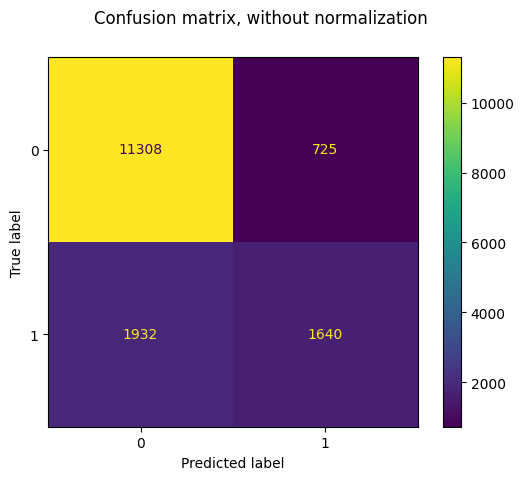

Normalized confusion matrix
[[0.93974902 0.06025098]
 [0.54087346 0.45912654]]


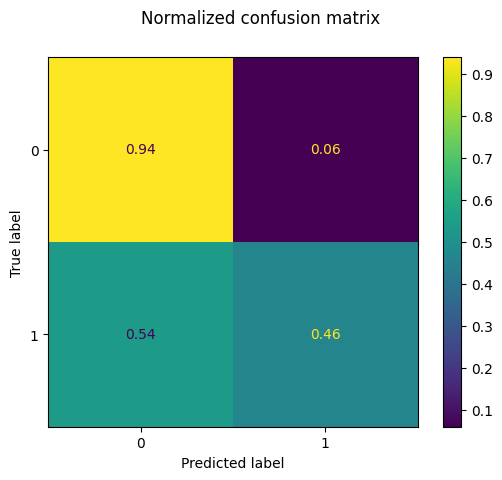

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
classifier = logreg
class_names = ["0", "1"]

for title, normalize in titles_options:
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp = disp.plot()  # Plot the confusion matrix

    disp.figure_.suptitle(title)
    print(title)
    print(cm)

    plt.show()


In [ ]:
import requests

access_token = 'YOUR_ACCESS_TOKEN'
url = f'https://graph.facebook.com/me/friends?access_token={access_token}'

response = requests.get(url)
data = response.json()

# In ra ID bạn bè
for friend in data['data']:
    print(friend['id'], friend['name'])
